In [69]:

script_start_time = time()
println("\nimporting packages...")

using Pkg
using Statistics
using LinearAlgebra
using Eirene
using StatsBase
using JLD
using Plots
Pkg.add("ColorSchemes")
using ColorSchemes
using JSON
using DataFrames
using MAT
using StatsPlots
using CSV
Pkg.add("HypothesisTests")
using HypothesisTests

include("helper_functions.jl")
println("packages and functions imported")
printstyled("Elapsed time = $(time() - script_start_time) seconds \n \n", color = :yellow)


importing packages...
 Resolving package versions...
  Updating `/opt/julia/environments/v1.2/Project.toml`
 [no changes]
  Updating `/opt/julia/environments/v1.2/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `/opt/julia/environments/v1.2/Project.toml`
 [no changes]
  Updating `/opt/julia/environments/v1.2/Manifest.toml`
 [no changes]
packages and functions imported
Elapsed time = 0.8176169395446777 seconds 
 


In [70]:
## Load in csv

traits = CSV.read("../data/HCP/unrelated100subjects_behavior.csv")

┌ Warning: `CSV.read(input; kw...)` is deprecated in favor of `using DataFrames; CSV.read(input, DataFrame; kw...)
│   caller = read(::String) at CSV.jl:40
└ @ CSV /opt/julia/packages/CSV/MKemC/src/CSV.jl:40


,Subject,Release,Acquisition,Gender,Age,3T_Full_MR_Compl,T1_Count,T2_Count
,Int64,String,String,String,String,Bool,Int64,Int64
1,100307,Q1,Q01,F,26-30,1,1,1
2,100408,Q3,Q03,M,31-35,1,1,1
3,101107,S500,Q06,M,22-25,1,2,2
4,101309,S500,Q06,M,26-30,1,1,1
5,101915,Q3,Q04,F,31-35,1,2,2
6,103111,S500,Q06,M,26-30,1,1,1
7,103414,Q2,Q02,F,22-25,1,1,1
8,103818,Q1,Q01,F,31-35,1,2,2
9,105014,S500,Q05,F,26-30,1,2,2


In [81]:
# Read in graph files

dsi_array = load("../processed_data/graphs/70nodes/dsi_matrices_091720_graphs.jld", "weighted_graph_array")
nNodes = size(dsi_array)[1]
thresh_array = load("../processed_data/graphs/70nodes/dsi_matrices_091720_graphs.jld", "nnz_edges")
rho_array = thresh_array./binomial(nNodes,2)
pids = matread("../data/HCP/dsi_matrices.mat")["sbj_id"]
pids = dropdims(parse.(Int64, pids), dims=2)
dsi_array

234×234×1500 Array{Float64,3}:
[:, :, 1] =
   0.0            0.803254       0.0976068  …      0.207452       0.272504 
   0.473163       0.0         1965.0               0.136973       0.0368617
   0.168122    1964.07           0.0               0.426748       0.308239 
   0.780544       0.940153    1994.29              0.244721       0.445915 
   0.960483    7528.88       23626.4             674.573        612.345    
   0.0900397      0.414743       0.20075    …      0.484151       0.169065 
   0.854135       0.653627       0.42816           0.374724       0.240327 
   0.760859       0.643852       0.706664          0.447538       0.567038 
 592.757          0.276999       0.069412          0.0569966      0.67984  
   0.54029    23006.4         3812.06              0.549896       0.987821 
   0.668923   18622.3         5466.72       …   1074.29         944.805    
   0.925147       0.328478       0.267484          0.514664       0.260517 
   0.556801       0.435822       0.918427    

In [20]:
unique(pids .== traits[!,"Subject"])

1-element Array{Bool,1}:
 1

In [74]:
# Load in betti bar results

betti_bars_all = load("../processed_data/results/70nodes/dsi_matrices_091720_forward_bettiBars.jld", "bettiBarArray")
betti_bars_pre = load("../processed_data/results/70nodes/dsi_matrices_091720_forward_bettiBars_prenoise.jld", "bettiBarArray")
betti_bars_post = load("../processed_data/results/70nodes/dsi_matrices_091720_forward_bettiBars_postnoise.jld", "bettiBarArray")
betti_bars_crossover = load("../processed_data/results/70nodes/dsi_matrices_091720_forward_bettiBars_crossover.jld", "bettiBarArray")


betti_bars_post

100×3 Array{Float64,2}:
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 ⋮            
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0

In [66]:
# Plot to see if any relation

df = DataFrame(bbar1 = betti_bars[:,1], bbar2 = betti_bars[:,2], bbar3 = betti_bars[:,3], Subject = pids, rho = rho_array, threshEdge = thresh_array)

# Join
big_df = innerjoin(df,traits, on=:Subject)

,bbar1,bbar2,bbar3,Subject,rho,threshEdge,Release,Acquisition
,Float64,Float64,Float64,Int64,Float64,Any,String,String
1,30753.0,22126.0,5659.0,100307,0.221489,6038.0,Q1,Q01
2,37791.0,19827.0,4652.0,100408,0.195664,5334.0,Q3,Q03
3,31754.0,17773.0,4666.0,101107,0.198305,5406.0,S500,Q06
4,33284.0,14460.0,3281.0,101309,0.20113,5483.0,S500,Q06
5,33960.0,17681.0,3475.0,101915,0.210704,5744.0,Q3,Q04
6,31992.0,18272.0,2679.0,103111,0.189061,5154.0,S500,Q06
7,29846.0,16786.0,2308.0,103414,0.206632,5633.0,Q2,Q02
8,28446.0,15115.0,2204.0,103818,0.210044,5726.0,Q1,Q01
9,34464.0,19690.0,1558.0,105014,0.195994,5343.0,S500,Q05


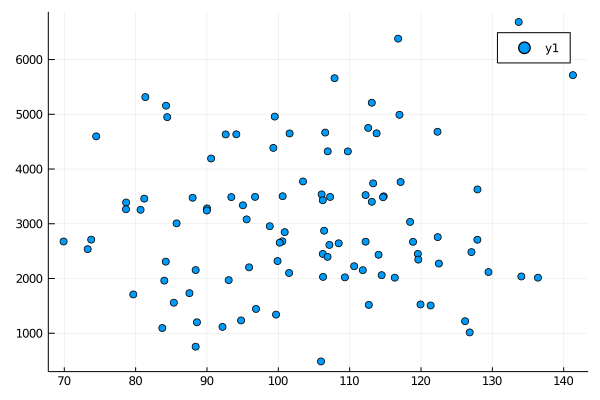

In [68]:
@df big_df scatter(:CogFluidComp_AgeAdj, :bbar3)

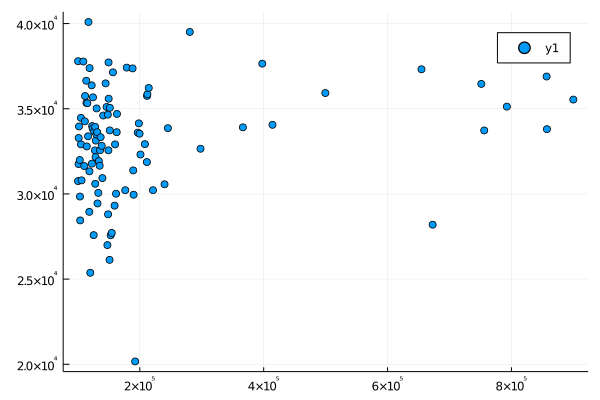

In [50]:
@df big_df scatter(
    :Subject,
    :bbar1
)

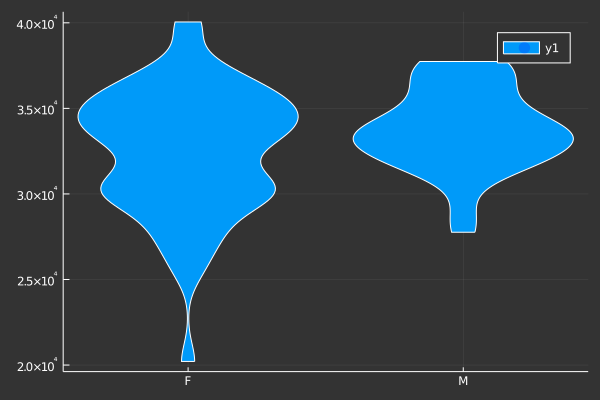

In [51]:
@df big_df violin(:Gender,:bbar1,marker=(0.2,:blue,stroke(0)), bg = RGB(0.2, 0.2, 0.2))

In [52]:
cor(big_df.Gender,big_df.bbar1)

MethodError: MethodError: no method matching +(::String, ::String)
Closest candidates are:
  +(::Any, ::Any, !Matched::Any, !Matched::Any...) at operators.jl:529
  +(!Matched::DataValues.DataValue{T1}, ::T2) where {T1, T2} at /opt/julia/packages/DataValues/N7oeL/src/scalar/operations.jl:66
  +(::T1, !Matched::DataValues.DataValue{T2}) where {T1, T2} at /opt/julia/packages/DataValues/N7oeL/src/scalar/operations.jl:76

In [53]:
bbar1_F = big_df.bbar1[big_df.Gender.=="F"]
bbar1_M = big_df.bbar1[big_df.Gender.=="M"]
EqualVarianceTTest(bbar1_F,bbar1_M)

Two sample t-test (equal variance)
----------------------------------
Population details:
    parameter of interest:   Mean difference
    value under h_0:         0
    point estimate:          -1293.121578099839
    95% confidence interval: (-2567.5235, -18.7197)

Test summary:
    outcome with 95% confidence: reject h_0
    two-sided p-value:           0.0468

Details:
    number of observations:   [54,46]
    t-statistic:              -2.0136172534945294
    degrees of freedom:       98
    empirical standard error: 642.1883681497528


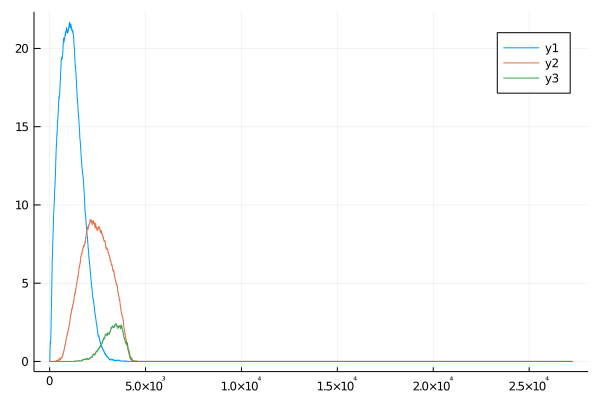

In [75]:
betti_dict = load("../processed_data/results/70nodes/dsi_matrices_091720_forward_bettis.jld")
bettisDSI = betti_dict["bettisArray"]

nEdges = binomial(nNodes,2)
plot([collect(1:nEdges)], dropdims(mean(bettisDSI, dims=1), dims=1))
# plot([collect(1:nEdges)], bettisDSI[:,:,1])

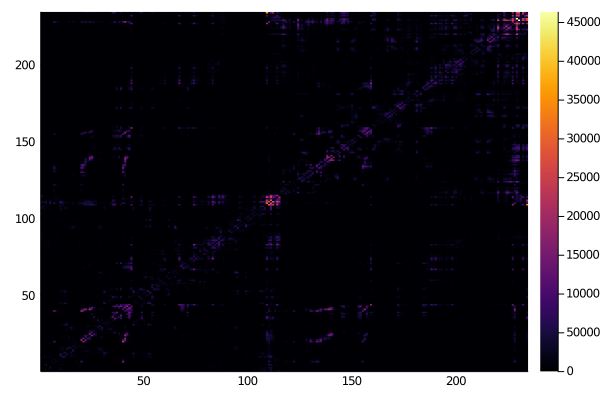

In [82]:
heatmap(dsi_array[:,:,50])

In [85]:
dsi_array[:,:,52]

234×234 Array{Float64,2}:
    0.0          930.538      …       0.50784         0.86871  
  930.362          0.0                0.0887438       0.722029 
    0.299473    7144.45               0.382597     1058.34     
    0.204086       0.155611           0.941234        0.0769749
    0.0294781   5558.52               0.985288     1704.91     
    0.421802       0.67346    …       0.240561        0.491804 
    0.846215       0.407486           0.0929244       0.613562 
 3094.43           0.763694           0.419431        0.822503 
 3934.3            0.72517            0.335676        0.620027 
    0.386431   25766.5                0.299064     2778.25     
    0.317753    4316.33       …       0.153401     3544.56     
    0.646154       0.705345           0.938703        0.0935229
    0.109575       0.415694           0.586304      590.462    
    ⋮                         ⋱                                
    0.170731       0.0322414      51196.1             1.04111e5
    0.384316  